# Solution to assigment on regression: Predicting house prices in King County using simple and multiple regression

#Fire up pandas

In [1]:
import pandas

#Load some house sales data
Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [4]:
sales = pandas.read_csv('D:\\PythonFiles\\Regression Analysis\\2_Codes\\home_data.csv')

In [5]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Exploring the data for housing sales 
The house price is correlated with the number of square feet of living space.

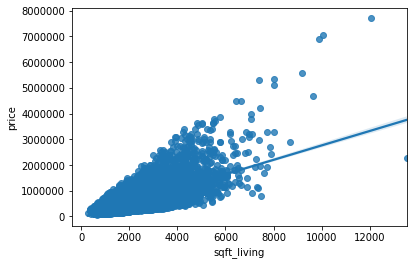

In [6]:
# let's try matplotlib and seaborn instead:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x="sqft_living", y="price", data=sales)

#Create a simple regression model of sqft_living to price

Split data into training and testing.

There are two ways of doing this, either using pandas [sample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function or the scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) function

In [7]:
len(sales)

21613

In [8]:
train_data = sales.sample(frac=0.8)

In [9]:
len(train_data) # Indeed 17290/21613 is 80% of all our data

17290

I like the scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) method which is very similar to the [SFrame random_split](https://dato.com/products/create/docs/generated/graphlab.SFrame.random_split.html). I'll set the random_state (or seed) to 42 so these results are reproducible. 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
test_data, train_data = train_test_split(sales, test_size=0.8, random_state=42)

In [16]:
len(train_data)

17291

In [17]:
len(test_data)

4322

In [18]:
from sklearn import linear_model
# Create linear regression object
regr_one_feature = linear_model.LinearRegression()

In [19]:
train_data_features = train_data["sqft_living"].values

In [20]:
train_data_features

array([2070, 2900, 3770, ..., 1900, 1330, 2830], dtype=int64)

In [21]:
train_data_targets = train_data["price"].values

In [22]:
train_data.sqft_living.shape

(17291,)

scikit-learn expects this to be a matrix in which every row is one sample. However we supplied a list of size 17291, which gets converted by sklearn to a matrix of 1 row with 17291 columns instead of a matrix with 1 column and 17291 rows. We need to transpose this matrix:

In [23]:
import numpy as np
training_data_features = np.array([train_data.sqft_living]).T

In [24]:
training_data_features.shape

(17291, 1)

In [25]:
training_data_targets = np.array([train_data.price]).T

In [26]:
regr_one_feature.fit(training_data_features, training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
regr_one_feature.coef_

array([[285.46625209]])

In [28]:
# Make predictions using the model and the data we set aside
test_data_features = np.array([test_data.sqft_living]).T
test_data_targets = np.array([test_data.price]).T

In [29]:
# Let's look at the variance (1 is a perfect prediction)
regr_one_feature.score(test_data_features, test_data_targets)

0.4819402631477646

In [30]:
test_data_targets.mean()

537485.2413234614

The mean price of our test data is about $537k. Let's compute the root mean square error (RMSE):

In [31]:
# The mean square error
import math
math.sqrt(np.mean((regr_one_feature.predict(test_data_features) - test_data_targets) ** 2))

245633.8012766714

OpenGraph Create had a RMSE of about $255k

scikit-learn has a RMSE of about $245k

Let's plot this and make sure it makes sense:

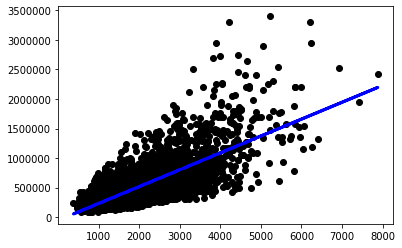

In [32]:
# Plot
plt.scatter(test_data_features, test_data_targets, color='black')
plt.plot(test_data_features, regr_one_feature.predict(test_data_features), color='blue', linewidth=3)

The plot looks good.

I'm going to look at some other metrics we can use for evaluating regression models from [scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [33]:
from sklearn.metrics import mean_squared_error # Same as the computation above the plot
mean_squared_error(test_data_targets, regr_one_feature.predict(test_data_features))

60335964329.6273

In [34]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data_targets, regr_one_feature.predict(test_data_features))

0.4819481403384548

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data_targets, regr_one_feature.predict(test_data_features))

174470.8480929812

In [36]:
from sklearn.metrics import median_absolute_error
median_absolute_error(test_data_targets, regr_one_feature.predict(test_data_features))

131779.33831602018

The mean squared error is very high, but the mean absolute and median absolute errors make sense.

#Explore other features in the data

To build a more elaborate model, we will explore using more features. We would expect the metrics to improve as we add more features.

In [37]:
training_data_many_features = train_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [38]:
training_data_many_features[0]

array([4.0000e+00, 2.2500e+00, 2.0700e+03, 8.8930e+03, 2.0000e+00,
       9.8058e+04])

In [39]:
training_data_many_features.shape

(17291, 6)

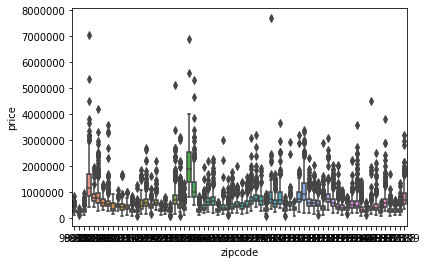

In [40]:
plot = sns.boxplot(x="zipcode", y="price", data=sales)

TODO: Make this graph bigger, and rotate x axis labels

In [41]:
regr_many_features = linear_model.LinearRegression()
regr_many_features.fit(training_data_many_features, training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Make predictions using the model and the data we set aside
test_data_many_features = test_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [43]:
mean_squared_error(test_data_targets, regr_many_features.predict(test_data_many_features))

57734871610.53561

In [44]:
explained_variance_score(test_data_targets, regr_many_features.predict(test_data_many_features))

0.5042772674240437

In [45]:
mean_absolute_error(test_data_targets, regr_many_features.predict(test_data_many_features))

167971.6489349792

In [46]:
median_absolute_error(test_data_targets, regr_many_features.predict(test_data_many_features))

123288.06139753014

Our variance score went up (improved), and our mean and median absolute errors went down by including more features in the regression model as expected.

#Apply learned models to predict prices of 3 houses
The first house we will use is considered an "average" house in Seattle.

In [47]:
house1 = sales.loc[sales['id'] == 5309101200]

In [48]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [49]:
house1_one_feature = house1[['sqft_living']].values
house1_many_features = house1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [52]:
print(house1.price.values)

[620000]


In [53]:
regr_one_feature.predict(house1_one_feature)

array([[631657.50189037]])

In [54]:
regr_many_features.predict(house1_many_features)

array([[634705.31641819]])

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature. However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [55]:
house2 = sales.loc[sales['id'] == 1925069082]

In [56]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [57]:
house2_one_feature = house2[['sqft_living']].values
house2_many_features = house2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [58]:
print house2.price.values

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(house2.price.values)? (<ipython-input-58-e8345e0b8c2f>, line 1)

In [59]:
regr_one_feature.predict(house2_one_feature)

array([[1271101.90657726]])

In [60]:
regr_many_features.predict(house2_many_features)

array([[1273902.48524426]])

In this case, the model with more features provides a slightly better prediction, though both are pretty far from the target value. Perhaps this is because it's a waterfront house, but our models do not take that into account.

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [61]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [62]:
house3 = pandas.DataFrame(data=bill_gates)

In [63]:
house3_many_features = house3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [65]:
house3_prediction = regr_many_features.predict(house3_many_features)
print(house3_prediction)

[[15861206.91985337]]


** Round off the values of the predicted price  to nearest integer **

In [70]:
print(np.round(house3_prediction,0))

[[15861207.]]


The model predicts a price of over $15M for this house! But we expect the house to cost much more. (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Answers to quiz

<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

1.	Using your Slope and Intercept from predicting prices from square feet, what is the predicted price for a house with 2960 sqft? Use American-style decimals without comma separators (e.g. 300000.34), and round your answer to 2 decimal places. Do not include the dollar sign.

    *
    *
    *
    *
    
2.	Using the learned slope and intercept from the square feet model, what is the RSS for the simple linear regression using square feet to predict prices on Testing data?
     
    *
    *
    *
    *
    
 
3.	According to the inverse regression function and the regression slope and intercept from predicting prices from square-feet, what is the estimated square-feet for a house costing $\$900,000$?
 
    *
    *
    *
    *
 

4.	What are the features used to predict the house of Mr. Bill Gates?
    
    a.	'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'floors', 'zipcode'
    
    b.	'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_above', 'floors', 'zipcode'
    
    c.	**'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode'**
    
    d.	'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_above', 'water front', 'zipcode'
5.	What is the predicted price for the house of Bill Gates?
    
    a.	**Between $\$15861200$ to $\$15861300$**
    
    b.	Between $\$15871200$ to $\$15871300$
    
    c.	Between $\$15891200$ to $\$15971300$
    
    d.	Between $\$16871200$ to $\$16871300

